In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('/content/SBAnational.csv')


/tmp/ipython-input-1588893598.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/SBAnational.csv')


In [ ]:
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
# Find columns with less than 5000 missing values but more than 0
cols_to_clean = [col for col in df.columns if 0 < df[col].isnull().sum() < 5000]

# Drop rows where these columns have missing values
df = df.dropna(subset=cols_to_clean)

# Reset index
df = df.reset_index(drop=True)

# Check remaining missing values
df.isnull().sum()


,0
LoanNr_ChkDgt,0
Name,0
City,0
State,0
Zip,0
Bank,0
BankState,0
NAICS,0
ApprovalDate,0
ApprovalFY,0


تم حذف الصفوف التي تحتوي على قيم مفقودة في الأعمدة التي يقل عدد القيم المفقودة فيها عن 5000، وذلك بهدف تنظيف البيانات من الفجوات الصغيرة التي قد تؤثر على دقة التحليل دون التأثير على حجم البيانات بشكل كبير.
_______________________________________________________________________________
قال ChatGPT:

Rows containing missing values in columns with fewer than 5,000 missing entries were removed to clean the dataset from minor gaps that could affect analysis accuracy, without significantly reducing the dataset size.

In [ ]:
df['State'].value_counts()

,count
State,
CA,129398
TX,69348
NY,56869
FL,40673
PA,34398
OH,32200
IL,29149
MA,24737
MN,24129


In [ ]:
df['Bank'].value_counts()


,count
Bank,
BANK OF AMERICA NATL ASSOC,86075
WELLS FARGO BANK NATL ASSOC,62934
JPMORGAN CHASE BANK NATL ASSOC,47460
U.S. BANK NATIONAL ASSOCIATION,34752
CITIZENS BANK NATL ASSOC,33569
...,...
GREENBANK,1
GLOBAL FINANCIAL SERVICES,1
"MAIN STREET LENDER, LLC",1


In [ ]:
df['BankState'].value_counts()


,count
BankState,
CA,116737
NC,78708
IL,64919
OH,57931
SD,50626
TX,47252
RI,43869
NY,39209
VA,28794


rilation between **State** and **BankState**

Same_State
Same State         467968
Different State    418272
Name: count, dtype: int64


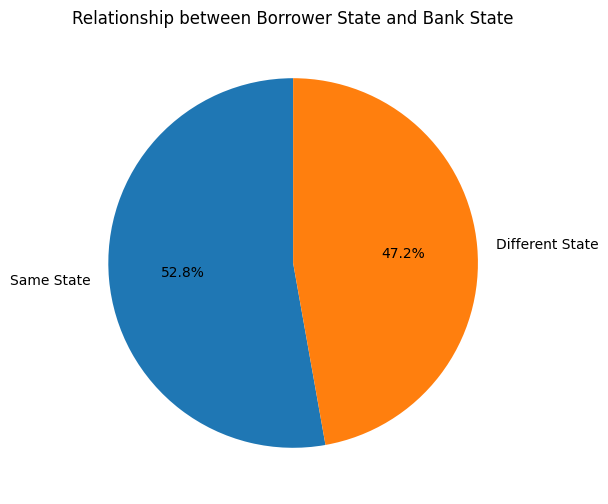

In [ ]:

# Create a column to check if borrower state equals bank state
df['Same_State'] = df['State'] == df['BankState']

# Count same vs different state
state_relation = df['Same_State'].value_counts().rename(index={True: 'Same State', False: 'Different State'})

# Display the counts
print(state_relation)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(state_relation, labels=state_relation.index, autopct='%1.1f%%', startangle=90)
plt.title("Relationship between Borrower State and Bank State")
plt.show()

من خلال التحليل وُجد أن هناك 473,940 قرضًا تم من بنوك داخل نفس الولاية، في حين أن 425,224 قرضًا صُدر من بنوك في ولايات مختلفة.

يُظهر ذلك أن نسبة كبيرة من أصحاب المشاريع الصغيرة يضطرون للحصول على تمويل من خارج ولايتهم، مما يشير إلى ضعف في اهتمام بعض البنوك المحلية بتمويل المشاريع الصغيرة.

الحل المقترح:
ينبغي تعزيز دور البنوك المحلية في دعم وتمويل المشاريع الصغيرة داخل ولاياتها من خلال برامج تمويل مخصصة وشروط ميسّرة، لضمان تقليل الاعتماد على البنوك الخارجية وتشجيع النمو الاقتصادي المحلي.
_______________________________________________________________________________
The analysis shows that 473,940 loans were issued by banks located in the same state as the borrowing companies, while 425,224 loans came from banks in different states.

This indicates that a significant number of small businesses rely on out-of-state banks for financing, which may reflect a lack of support from local banks toward small business needs.

Proposed Solution:
Local banks should be encouraged to focus more on supporting and financing small businesses within their own states by offering tailored funding programs and flexible conditions. This would reduce dependence on external banks and strengthen local economic growth.


In [ ]:
df['NAICS'].value_counts()

,count
NAICS,
0,198267
722110,27772
722211,19338
811111,14392
621210,13856
...,...
327410,1
313310,1
333413,1


In [ ]:
df['Name'].value_counts()

,count
Name,
SUBWAY,1259
QUIZNO'S SUBS,433
COLD STONE CREAMERY,366
QUIZNO'S,344
DAIRY QUEEN,325
...,...
"BAR-BELL,INC.",1
"CINDERELLA CLEANERS, INC.",1
TOTAL BODY CHIROPRACTIC P C AN,1


Unique_NAICS_Count
1     746312
2      20874
3       1959
4        382
5        146
6         63
7         37
8         19
9         16
10         2
11         9
12         5
13         3
14         1
15         4
16         3
20         1
21         2
Name: count, dtype: int64

Examples of companies with multiple NAICS codes:
                               Name  Unique_NAICS_Count
93              "Z" LIMOUSINE, INC.                   2
128                          #NAME?                   2
190                'E' EXPRESS INC.                   2
470             03 TECHNOLOGIES LLC                   2
488                  1 800 GOT JUNK                   2
506  1 FLEX NATURAL BODY BUILDING L                   2
525       1 NATION TECHNOLOGY CORP.                   2
529         1 ON 1 CONSULTING, INC.                   3
580                   1-800 FLOWERS                   2
582                1-800 PHONE GUYS                   2


/tmp/ipython-input-2758868010.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


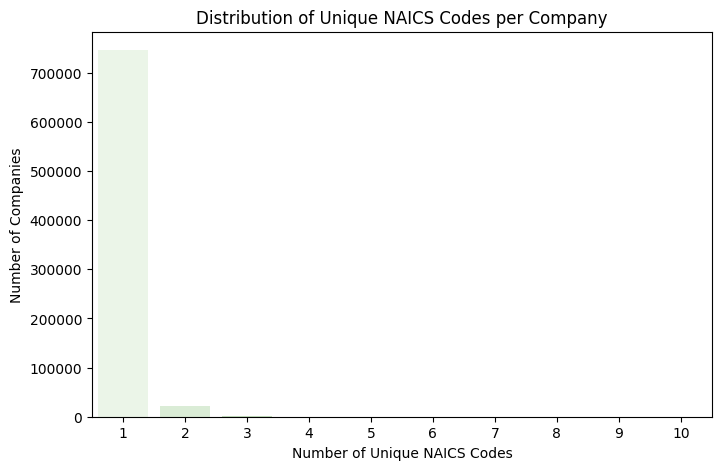

In [ ]:

# Keep only relevant columns
df_subset = df[['Name', 'NAICS']].dropna()

# Group by company name and count distinct NAICS codes
naics_per_name = df_subset.groupby('Name')['NAICS'].nunique().reset_index(name='Unique_NAICS_Count')

# Display how many companies have one unique NAICS vs multiple
summary = naics_per_name['Unique_NAICS_Count'].value_counts().sort_index()
print(summary)

# Show examples of companies with multiple NAICS codes
multi_naics = naics_per_name[naics_per_name['Unique_NAICS_Count'] > 1]
print("\nExamples of companies with multiple NAICS codes:")
print(multi_naics.head(10))


# --- 2 Plot distribution of Unique NAICS codes per company ---
plt.figure(figsize=(8,5))
sns.barplot(
    x=summary.index[:10],  # Show only top 10 categories for clarity
    y=summary.values[:10],
    palette='Greens'
)
plt.title('Distribution of Unique NAICS Codes per Company')
plt.xlabel('Number of Unique NAICS Codes')
plt.ylabel('Number of Companies')
plt.show()


ملاحظة: يوجد 755,615 شركة تعمل في نشاط واحد فقط (NAICS واحد).
وده بيوضح إن في علاقة قوية بين اسم الشركة ونوع النشاط اللي بتشتغل فيه.
بالتالي، القيم اللي في عمود NAICS = 0 ممكن تتعوض أو تتقدر بشكل منطقي بناءً على اسم الشركة.
_______________________________________________________________________________
Observation: There are 755,615 companies operating under only one unique NAICS code.
This shows a strong relationship between the company name and its business activity.
 Therefore, the NAICS values equal to 0 can be estimated or filled based on the company name.**bold text**

In [ ]:
# Replace 0 with NA based on company name
df.loc[df['NAICS'] == 0, 'NAICS'] = np.nan

# Fill missing NAICS using the most common NAICS per company name
df['NAICS'] = df.groupby('Name')['NAICS'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [ ]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,0
City,0
State,0
Zip,0
Bank,0
BankState,0
NAICS,176215
ApprovalDate,0
ApprovalFY,0




Note: I replaced the values equal to 0 in the NAICS column based on the company name, but not all missing values were filled. Therefore, I used the KNN Imputer to fill the remaining missing values.


_______________________________________________________________________________
ملاحظة: تم تعويض القيم التي تساوي 0 في عمود NAICS بناءً على اسم الشركة، ولكن لم يتم ملء جميع القيم المفقودة، لذلك تم استخدام KNN Imputer لإكمال القيم المتبقية.


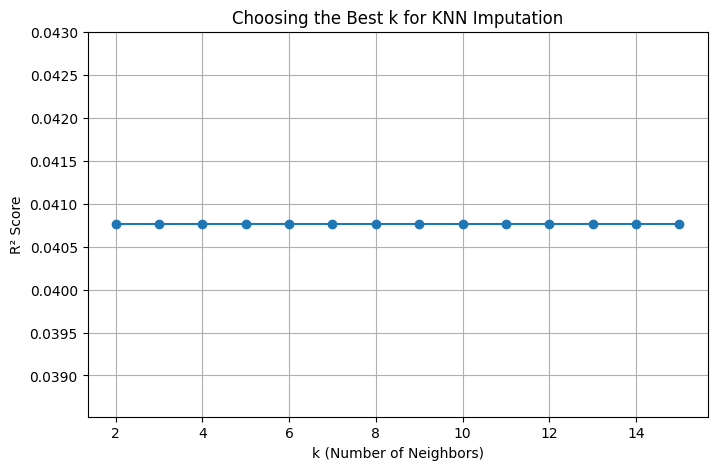

In [ ]:


# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols].copy()

# Drop rows where NAICS is missing for training
mask = df_numeric['NAICS'].isnull()
known = df_numeric[~mask]

X = known.drop(columns=['NAICS'])
y = known['NAICS']

# Try multiple k values
k_values = range(2, 16)
scores = []

for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    X_imputed = imputer.fit_transform(X)

    model = RandomForestRegressor(random_state=42)
    score = cross_val_score(model, X_imputed, y, scoring='r2', cv=3).mean()
    scores.append(score)

# Plot R² vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("R² Score")
plt.title("Choosing the Best k for KNN Imputation")
plt.grid(True)
plt.show()


In [5]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Copy the numeric data
df_numeric = df[numeric_cols].copy()

# Create KNN imputer with your chosen k (replace 5 with your best k)
k_value = 3
imputer = KNNImputer(n_neighbors=k_value)

# Apply imputation
df_imputed = imputer.fit_transform(df_numeric)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=numeric_cols)

# Replace the original NAICS column with the imputed one
df['NAICS'] = df_imputed['NAICS']

# Verify if there are still missing values
print("Missing values in NAICS after imputation:", df['NAICS'].isnull().sum())


Missing values in NAICS after imputation: 0


In [6]:
df['NAICS'].value_counts()

,count
NAICS,
0.0,201948
722110.0,27989
722211.0,19448
811111.0,14585
621210.0,14048
...,...
212324.0,1
312210.0,1
925120.0,1


In [10]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [11]:
# Find columns with less than 5000 missing values but more than 0
cols_to_clean = [col for col in df.columns if 0 < df[col].isnull().sum() < 5000]

# Drop rows where these columns have missing values
df = df.dropna(subset=cols_to_clean)

# Reset index
df = df.reset_index(drop=True)

# Check remaining missing values
df.isnull().sum()


,0
LoanNr_ChkDgt,0
Name,0
City,0
State,0
Zip,0
Bank,0
BankState,0
NAICS,0
ApprovalDate,0
ApprovalFY,0



العمود ChgOffDate يحتوي على 725,369 قيمة، لكنه لا يضيف معلومات جديدة لأن حالتي القرض (MIS_Status) والمبلغ المشطوب (ChgOffPrinGr) تغطي نفس المعنى. لذلك يمكن الاستغناء عنه لتقليل التكرار في البيانات.
__________________________________________________________

The column ChgOffDate contains 725,369 values, but it does not provide additional information since both MIS_Status and ChgOffPrinGr already represent the charge-off status and amount. Therefore, it can be safely removed to avoid redundancy in the dataset.

In [12]:
df['ChgOffPrinGr'].value_counts()

,count
ChgOffPrinGr,
$0.00,726032
"$50,000.00",2101
"$10,000.00",1858
"$25,000.00",1363
"$35,000.00",1339
...,...
"$198,356.00",1
"$118,346.00",1
"$20,804.00",1


In [13]:
df['MIS_Status'].value_counts()

,count
MIS_Status,
P I F,730199
CHGOFF,156041


In [14]:
# Drop unnecessary columns
df = df.drop(columns=['ChgOffDate', 'LoanNr_ChkDgt', 'Name'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886240 entries, 0 to 886239
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               886240 non-null  object 
 1   State              886240 non-null  object 
 2   Zip                886240 non-null  int64  
 3   Bank               886240 non-null  object 
 4   BankState          886240 non-null  object 
 5   NAICS              886240 non-null  float64
 6   ApprovalDate       886240 non-null  object 
 7   ApprovalFY         886240 non-null  object 
 8   Term               886240 non-null  int64  
 9   NoEmp              886240 non-null  int64  
 10  NewExist           886240 non-null  float64
 11  CreateJob          886240 non-null  int64  
 12  RetainedJob        886240 non-null  int64  
 13  FranchiseCode      886240 non-null  int64  
 14  UrbanRural         886240 non-null  int64  
 15  RevLineCr          886240 non-null  object 
 16  Lo

In [16]:
from google.colab import files
files.download('/content/cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>